Capstone 3 draft

In [0]:
# !pip install pyclustering


This is an interactive version of the Multidimensional Sexual Self-Concept Questionnaire.

Introduction
Sexual self-concept is a persons own view of their sexual behaviours and actions.

The MSSCQ was created by Dr. William E. Snell, Jr. in 1995 for the general study of sexuality. It measures along twenty separate scales.

Procedure
The inventory consists of one hundred statements that must be rated on how characteristic they are of the subject. The test should not take most people more than eight minutes.


In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
# from pyclustering.cluster.kmedoids import kmedoids
import random
from sklearn import metrics




In [0]:

# answer goes here

link= 'https://docs.google.com/spreadsheets/d/1EVsI6xR6q31xh5ByAWcWKa-A20JsSZYu2q98yrQgHc8/export?format=csv'
df = pd.read_csv(link)

In [0]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
0,3,2,5,5,1,2,2,1,1,2,2,3,3,1,1,5,1,2,4,3,3,2,4,5,1,1,2,1,1,1,3,3,3,1,1,5,1,3,5,4,...,4,5,2,1,5,3,2,2,4,3,2,1,1,5,5,3,5,3,4,4,4,5,1,1,4,4,1,3,4,2,4,1,1,5,5,3,5,4,23,1
1,5,1,5,1,1,2,1,3,1,1,1,4,1,2,1,1,5,1,5,2,0,1,4,2,1,1,1,2,2,4,1,2,1,1,1,1,5,1,4,4,...,3,3,1,1,1,3,1,5,1,2,1,1,1,1,1,1,5,2,5,2,4,2,1,1,1,2,1,2,1,1,1,1,1,2,1,1,5,3,25,2
2,1,4,5,5,1,4,5,5,5,4,5,5,5,4,2,5,1,4,1,5,1,5,5,5,2,1,2,5,4,4,4,4,5,4,2,5,2,4,2,4,...,5,5,2,2,4,2,4,2,5,5,5,5,1,5,4,4,1,5,1,4,5,5,1,2,4,1,1,4,5,5,5,5,1,5,4,4,1,4,20,1
3,5,4,5,5,5,5,2,4,5,5,5,2,5,1,1,5,1,4,5,1,5,3,5,4,5,0,1,5,1,1,5,2,3,1,1,5,1,4,5,4,...,5,5,5,5,5,3,2,1,4,5,5,1,3,5,5,5,2,4,2,4,5,5,5,5,4,4,2,5,4,4,4,1,2,5,0,4,5,5,23,2
4,4,5,4,5,4,2,3,2,4,5,1,3,4,3,3,1,5,2,5,3,5,3,3,5,3,1,2,2,4,4,1,1,1,1,4,1,4,1,4,4,...,3,5,2,0,3,3,2,4,2,4,2,2,4,1,1,1,1,3,4,3,3,4,1,2,2,3,3,4,1,3,1,1,3,1,1,1,4,3,50,2


In [0]:
df.isna().sum() != 0

Q1        False
Q2        False
Q3        False
Q4        False
Q5        False
          ...  
Q98       False
Q99       False
Q100      False
age       False
gender    False
Length: 102, dtype: bool

In [0]:
(df.isna().sum() != 0).nunique()

1

In [0]:
import seaborn as sns

# sns.pairplot(df)
# plt.show()

In [0]:
df.corr()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
Q1,1.000000,-0.332344,-0.266333,0.052380,0.156858,-0.045511,-0.308912,-0.312617,0.125649,-0.021438,-0.252417,-0.205344,-0.298490,-0.304118,0.187669,-0.214655,0.467681,-0.014660,0.483747,-0.110054,0.548135,-0.372680,-0.262132,0.049822,0.221072,-0.000267,0.344831,-0.303827,0.098998,0.334087,-0.225971,-0.081973,-0.388617,-0.362820,0.206899,-0.212561,0.513494,-0.151642,0.364794,-0.051589,...,-0.127043,0.034102,0.222759,-0.008959,-0.333907,0.315144,0.063718,0.334615,-0.132843,-0.048281,-0.428237,-0.401041,0.224238,-0.245044,-0.411623,-0.116777,0.434585,-0.059625,0.604487,-0.308647,-0.162001,0.052310,0.203523,-0.013904,-0.336269,0.403093,0.050885,0.020563,-0.252804,-0.053506,-0.424706,-0.400269,0.224115,-0.195351,-0.346264,-0.092447,0.476997,-0.205629,-0.003299,-0.016305
Q2,-0.332344,1.000000,0.430571,0.013689,-0.074596,0.094765,0.372821,0.322204,0.009839,0.155321,0.255919,0.309094,0.420252,0.419661,-0.103519,0.242953,-0.271615,0.111354,-0.343919,0.202795,-0.323858,0.579433,0.336773,0.012844,-0.158281,0.058188,-0.274486,0.320054,0.017086,-0.158121,0.239105,0.191932,0.482184,0.468656,-0.169797,0.233507,-0.303454,0.229612,-0.313544,0.165251,...,0.244301,0.035827,-0.159220,0.054196,0.344990,-0.198422,0.038452,-0.156858,0.139367,0.140079,0.465987,0.454593,-0.142422,0.250815,0.315800,0.171287,-0.310993,0.170259,-0.347224,0.558133,0.255909,0.022986,-0.132007,0.061147,0.349016,-0.289350,0.039195,0.097407,0.261709,0.143668,0.452487,0.441340,-0.155543,0.203066,0.277971,0.156161,-0.322503,0.263975,-0.013766,0.060235
Q3,-0.266333,0.430571,1.000000,0.033776,-0.001449,0.340243,0.417340,0.354402,0.012785,0.198513,0.417888,0.302303,0.355957,0.168182,-0.053546,0.381749,-0.321358,0.089673,-0.157050,0.217363,-0.168550,0.387979,0.630947,0.002306,-0.084521,0.273932,-0.255207,0.298325,0.011963,-0.110097,0.401055,0.199069,0.368972,0.248452,-0.072846,0.363705,-0.359949,0.189932,-0.101540,0.153852,...,0.402760,0.053902,-0.049062,0.287815,0.377983,-0.130376,0.044954,-0.092416,0.323185,0.161374,0.386837,0.313559,-0.077144,0.309820,0.369738,0.166143,-0.194087,0.147796,-0.293002,0.335490,0.446679,0.021211,-0.040107,0.283967,0.380741,-0.180348,0.057901,0.153497,0.363748,0.153836,0.389499,0.267469,-0.078234,0.284245,0.362965,0.161758,-0.221389,0.244797,-0.006577,-0.053109
Q4,0.052380,0.013689,0.033776,1.000000,-0.021982,-0.085916,-0.024936,0.043204,0.038777,-0.017282,-0.086910,0.052375,-0.001454,0.030407,-0.008213,-0.025411,0.117447,0.149755,0.025476,0.041403,0.027779,0.011653,0.019368,0.357867,-0.030232,-0.088474,0.069845,0.050681,0.034700,0.007683,-0.043942,0.051927,0.025222,0.017457,-0.011253,-0.033623,0.101513,0.116028,0.019274,0.052522,...,0.031885,0.171728,-0.027817,-0.082208,-0.023120,-0.010031,0.020984,0.010196,-0.061447,0.048452,0.021348,-0.015244,-0.014045,0.009919,-0.056268,0.069543,0.038353,0.053644,0.048309,0.026800,0.031263,0.228870,-0.001068,-0.087287,-0.027388,0.005282,0.029964,0.006052,-0.065707,0.057050,0.006411,0.006995,-0.002957,0.022530,-0.056638,0.074315,0.039334,0.039458,-0.007020,0.042350
Q5,0.156858,-0.074596,-0.001449,-0.021982,1.000000,0.165064,-0.006549,-0.050481,0.097443,0.092808,0.060546,-0.001529,-0.022257,-0.183956,0.192674,0.068041,0.065283,-0.012947,0.216027,-0.005292,0.192944,-0.124174,-0.003553,-0.121593,0.565849,0.163271,0.130323,-0.079200,0.080026,0.140972,0.031811,0.026329,-0.108260,-0.167356,0.147228,0.069634,0.084804,-0.041912,0.236043,0.002932,...,0.001160,-0.057177,0.460448,0.151378,-0.051857,0.134906,0.073630,0.159711,0.087727,0.019334,-0.115029,-0.142759,0.185178,-0.056120,-0.018735,0.002225,0.189564,0.013325,0.158187,-0.083519,-0.022189,-0.095243,0.337898,0.144651,-0.044349,0.171357,0.069072,0.077225,0.

In [0]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [0]:
# make copy of df

df_copy = df.copy()

# make new df with gender and age columns

gender_age = df_copy[['age', 'gender']]

# make new df with question columns

questions = df_copy.drop(['age', 'gender'], axis=1)

In [0]:
questions.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q61,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100
0,3,2,5,5,1,2,2,1,1,2,2,3,3,1,1,5,1,2,4,3,3,2,4,5,1,1,2,1,1,1,3,3,3,1,1,5,1,3,5,4,...,5,3,4,5,2,1,5,3,2,2,4,3,2,1,1,5,5,3,5,3,4,4,4,5,1,1,4,4,1,3,4,2,4,1,1,5,5,3,5,4
1,5,1,5,1,1,2,1,3,1,1,1,4,1,2,1,1,5,1,5,2,0,1,4,2,1,1,1,2,2,4,1,2,1,1,1,1,5,1,4,4,...,5,1,3,3,1,1,1,3,1,5,1,2,1,1,1,1,1,1,5,2,5,2,4,2,1,1,1,2,1,2,1,1,1,1,1,2,1,1,5,3
2,1,4,5,5,1,4,5,5,5,4,5,5,5,4,2,5,1,4,1,5,1,5,5,5,2,1,2,5,4,4,4,4,5,4,2,5,2,4,2,4,...,2,5,5,5,2,2,4,2,4,2,5,5,5,5,1,5,4,4,1,5,1,4,5,5,1,2,4,1,1,4,5,5,5,5,1,5,4,4,1,4
3,5,4,5,5,5,5,2,4,5,5,5,2,5,1,1,5,1,4,5,1,5,3,5,4,5,0,1,5,1,1,5,2,3,1,1,5,1,4,5,4,...,5,5,5,5,5,5,5,3,2,1,4,5,5,1,3,5,5,5,2,4,2,4,5,5,5,5,4,4,2,5,4,4,4,1,2,5,0,4,5,5
4,4,5,4,5,4,2,3,2,4,5,1,3,4,3,3,1,5,2,5,3,5,3,3,5,3,1,2,2,4,4,1,1,1,1,4,1,4,1,4,4,...,4,3,3,5,2,0,3,3,2,4,2,4,2,2,4,1,1,1,1,3,4,3,3,4,1,2,2,3,3,4,1,3,1,1,3,1,1,1,4,3


In [0]:
gender_age.head()
gender_age.isna().sum()

age       0
gender    0
dtype: int64

In [0]:
gender_age.mean()

# check age for weird values


age       499.631665
gender      1.601357
dtype: float64

In [0]:
gender_age.max()

#age       8346346


age       8346346
gender          3
dtype: int64

In [0]:
gender_age[gender_age['age'] == 8346346] # reporting error?

,age,gender
8157,8346346,3


In [0]:
clean_ga = gender_age[gender_age['age'] != 8346346]

In [0]:
clean_ga.max()

age       9877
gender       3
dtype: int64

In [0]:
outliers_ga = clean_ga[clean_ga['age'] >= 90].sort_values(by='age')

In [0]:
outliers_ga.groupby(['age']).sum()['gender']

age
90      4
98      3
99      4
100     5
125     2
150     3
200     1
222     1
236     2
265     1
378     1
400     1
1995    2
9599    1
9877    3
Name: gender, dtype: int64

In [0]:
groupby_gender = df.groupby('gender').count()

# plt.figure(figsize=(10,8))
# groupby_gender.plot(kind='pie', table=True, colormap='jet') # annotate bars
# plt.show()

groupby_gender.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q62,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,...,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000,4421.250000
std,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,...,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132,4969.951132
min,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,...,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
25%,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.750000,299.75

In [0]:
df.groupby('age').sum()[['gender']].sort_values(by='gender', ascending=False) # largest response group age 18

,gender
age,
18,2759
19,2265
20,1988
17,1957
21,1873
...,...
265,1
378,1
400,1


In [0]:

df_copy.describe()
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17685 entries, 0 to 17684
Columns: 102 entries, Q1 to gender
dtypes: int64(102)
memory usage: 13.8 MB


dataframe of observations with questionable values

In [0]:
bad_ages = [125, 150, 200, 222, 236, 265, 378, 400, 1995, 9599, 9877, 8346346]

df_copy[df_copy['age'].isin(bad_ages)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
509,5,1,3,5,3,1,1,1,1,1,1,1,1,1,1,1,5,1,5,1,0,1,5,5,5,1,5,1,5,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,1
1686,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9877,3
2440,3,2,4,4,4,4,2,3,4,3,4,3,3,1,2,3,3,4,5,4,3,2,4,5,4,4,4,3,3,3,4,4,3,1,4,3,3,4,5,4,...,4,5,4,4,3,4,4,3,4,4,2,3,3,4,2,3,2,4,2,4,3,5,4,4,2,4,4,3,2,3,2,1,3,4,3,3,2,3,200,1
5065,2,5,5,1,3,2,3,4,1,2,4,4,2,3,4,4,2,3,1,4,2,4,3,1,4,2,4,4,1,3,2,4,4,5,4,4,1,4,1,2,...,3,2,3,2,3,1,1,2,2,3,4,4,4,5,4,3,1,2,1,5,3,2,3,1,2,4,1,1,2,2,3,5,4,3,4,2,1,4,400,1
8157,2,1,3,2,2,3,4,1,4,3,5,3,4,1,1,4,1,4,5,4,4,2,4,2,2,1,2,2,4,3,3,4,3,2,1,3,1,2,5,4,...,3,4,3,3,4,4,3,3,4,4,4,1,1,5,5,3,5,4,3,3,3,3,3,3,4,4,4,4,4,3,3,1,1,4,5,2,5,4,8346346,3
8439,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,150,3
8700,1,4,5,5,2,4,4,4,3,5,3,5,4,3,2,4,3,4,3,1,2,5,4,5,2,4,2,5,3,5,5,3,5,3,3,5,3,4,3,3,...,5,5,2,4,4,3,1,4,4,3,4,3,2,5,3,5,4,3,3,5,5,5,2,3,4,1,2,5,3,2,4,2,2,5,3,4,3,5,125,2
11907,1,5,5,3,3,2,5,5,5,5,4,5,4,4,3,5,1,5,1,5,1,5,5,5,1,1,1,5,5,1,3,4,5,5,3,5,1,5,1,4,...,5,5,3,2,4,1,5,1,3,5,5,4,1,3,5,5,1,4,1,5,5,5,0,2,4,1,5,3,3,5,5,5,3,4,5,3,1,5,265,1
11958,4,2,5,5,1,5,2,1,1,1,2,5,1,1,1,3,5,1,5,4,5,1,4,5,2,3,5,1,5,1,1,4,1,1,1,1,5,1,5,5,...,4,5,1,4,1,5,5,1,4,5,1,1,1,1,1,5,5,3,5,3,4,5,4,4,1,1,4,1,1,3,1,1,1,1,3,5,5,5,1995,2
12437,1,4,4,5,1,3,2,4,4,1,3,4,2,4,1,4,1,2,1,5,1,4,3,5,2,2,4,4,5,2,4,4,3,4,2,3,1,3,2,4,...,4,5,3,3,2,2,3,3,5,5,4,4,1,3,5,4,1,4,1,4,4,5,2,2,2,2,4,3,3,5,4,4,2,3,5,3,1,5,378,1


make dataframe without questionable age values

In [0]:
bad_ages = [125, 150, 200, 222, 236, 265, 378, 400, 1995, 9599, 9877, 8346346]

clean_df = df_copy[~df_copy['age'].isin(bad_ages)]

In [0]:
clean_df.isnull().sum().nunique() # no missing values

1

In [0]:
df_eda = clean_df.copy()

In [0]:
# sns.pairplot(df_eda.drop(['age', 'gender'], axis=1))
# plt.show()

In [0]:
# df_eda.age.plot(kind='barh')

1 loop, best of 3: 1.07 s per loop


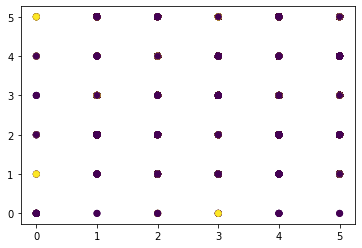

In [0]:
k_means = KMeans(n_clusters=2, random_state=42)
%timeit k_means.fit(df_eda)
y_pred = k_means.predict(df_eda)

plt.scatter(df_eda.iloc[:,0], df_eda.iloc[:,1], c=y_pred)
plt.show()

# add dimensionality technique 



In [0]:
df_eda.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Q37,Q38,Q39,Q40,...,Q63,Q64,Q65,Q66,Q67,Q68,Q69,Q70,Q71,Q72,Q73,Q74,Q75,Q76,Q77,Q78,Q79,Q80,Q81,Q82,Q83,Q84,Q85,Q86,Q87,Q88,Q89,Q90,Q91,Q92,Q93,Q94,Q95,Q96,Q97,Q98,Q99,Q100,age,gender
0,3,2,5,5,1,2,2,1,1,2,2,3,3,1,1,5,1,2,4,3,3,2,4,5,1,1,2,1,1,1,3,3,3,1,1,5,1,3,5,4,...,4,5,2,1,5,3,2,2,4,3,2,1,1,5,5,3,5,3,4,4,4,5,1,1,4,4,1,3,4,2,4,1,1,5,5,3,5,4,23,1
1,5,1,5,1,1,2,1,3,1,1,1,4,1,2,1,1,5,1,5,2,0,1,4,2,1,1,1,2,2,4,1,2,1,1,1,1,5,1,4,4,...,3,3,1,1,1,3,1,5,1,2,1,1,1,1,1,1,5,2,5,2,4,2,1,1,1,2,1,2,1,1,1,1,1,2,1,1,5,3,25,2
2,1,4,5,5,1,4,5,5,5,4,5,5,5,4,2,5,1,4,1,5,1,5,5,5,2,1,2,5,4,4,4,4,5,4,2,5,2,4,2,4,...,5,5,2,2,4,2,4,2,5,5,5,5,1,5,4,4,1,5,1,4,5,5,1,2,4,1,1,4,5,5,5,5,1,5,4,4,1,4,20,1
3,5,4,5,5,5,5,2,4,5,5,5,2,5,1,1,5,1,4,5,1,5,3,5,4,5,0,1,5,1,1,5,2,3,1,1,5,1,4,5,4,...,5,5,5,5,5,3,2,1,4,5,5,1,3,5,5,5,2,4,2,4,5,5,5,5,4,4,2,5,4,4,4,1,2,5,0,4,5,5,23,2
4,4,5,4,5,4,2,3,2,4,5,1,3,4,3,3,1,5,2,5,3,5,3,3,5,3,1,2,2,4,4,1,1,1,1,4,1,4,1,4,4,...,3,5,2,0,3,3,2,4,2,4,2,2,4,1,1,1,1,3,4,3,3,4,1,2,2,3,3,4,1,3,1,1,3,1,1,1,4,3,50,2


In [0]:
df_eda.shape

(17673, 102)

In [0]:
# gmm_cluster = GaussianMixture(n_components=3, random_state=42)
# df_eda

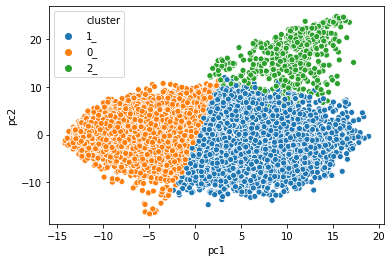

In [0]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

X = df_copy.drop(columns=['age', 'gender'])
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

pca = PCA(2)
pcs = pca.fit_transform(X)

pca_df = pd.DataFrame(pcs, columns=['pc1', 'pc2'])
pca_df['cluster'] = kmeans.labels_
pca_df['cluster'] = pca_df['cluster'].astype(str) + '_'

sns.scatterplot('pc1', 'pc2', hue='cluster', data=pca_df)
plt.show()

# follow up analysis
# what is mixture of age per cluster?
# what is mixture of gender per cluster?


In [0]:
kmeans.labels_

array([1, 1, 0, ..., 0, 0, 1], dtype=int32)

In [0]:
labels = KMeans(n_clusters=4, random_state=123).fit_predict(X)
print(metrics.silhouette_score(X, labels, metric='euclidean'))

0.11711538916575998


In [0]:
cc = pd.DataFrame(kmeans.cluster_centers_)

In [0]:
# row 2 - row1 

cc.head()



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,1.913226,4.074809,4.513744,3.378247,2.320578,3.140239,3.446265,4.131616,3.279401,3.359599,3.927778,3.985987,3.679207,3.353563,1.599439,4.435701,1.673278,3.575617,1.747871,4.152312,2.106177,4.143042,4.499731,4.080845,2.042147,2.399590,2.455427,4.349359,3.289857,2.301175,3.938773,3.854910,3.930365,3.666810,1.879379,4.295139,1.479250,3.942546,2.105638,3.941468,...,2.017678,4.187129,4.269591,4.533254,2.076102,2.768028,3.619597,2.258597,3.146599,2.169128,3.744098,3.954835,4.214509,3.782473,1.626172,4.365851,4.061981,3.818152,1.793576,3.821278,1.675434,4.240811,4.511911,4.259782,1.873882,2.672739,3.612159,1.877331,3.126011,3.377816,3.605691,3.916999,4.085157,3.782149,1.646006,4.390428,4.340627,3.778377,1.604721,4.376199
1,3.437825,2.746102,3.506275,3.487895,2.783750,2.742426,2.091393,2.791609,3.468500,2.906706,2.702624,3.170998,2.208518,1.887311,2.029028,3.507669,3.236025,3.316010,3.380276,3.568767,3.606034,2.573330,3.498035,4.135885,2.737229,2.154646,3.783750,3.108759,3.432374,3.184307,2.809355,3.401445,2.213082,1.952972,2.489035,3.301559,3.179237,3.273799,3.587020,3.549499,...,3.665991,2.794651,3.560654,4.505260,2.809735,2.488021,2.076436,3.254532,3.192040,3.074027,3.007479,3.626695,2.374826,1.876410,2.248701,3.202687,2.358854,3.263024,3.426797,3.425402,3.515908,2.871593,3.734314,4.275067,2.477754,2.366967,2.084928,3.288756,3.109139,3.145012,2.305615,3.548992,2.164533,1.892635,2.301813,3.488148,2.832045,3.282672,3.311953,3.429078
2,2.431599,3.005780,3.414258,2.949904,2.312139,2.499037,2.410405,2.861272,2.576108,2.394990,2.601156,2.778420,2.304432,2.092486,1.470135,2.957611,1.921002,2.566474,1.824663,2.786127,1.973025,2.418112,2.780347,2.695568,1.714836,1.549133,2.111753,2.514451,2.055877,1.570328,1.892100,2.000000,1.664740,1.655106,1.154143,1.782274,1.198459,1.514451,1.144509,1.368015,...,0.377649,0.402697,0.375723,0.566474,0.246628,0.240848,0.289017,0.287091,0.235067,0.210019,0.236994,0.290944,0.235067,0.238921,0.167630,0.240848,0.248555,0.213873,0.204239,0.225434,0.258189,0.254335,0.300578,0.412331,0.246628,0.279383,0.265896,0.236994,0.333333,0.308285,0.294798,0.360308,0.337187,0.387283,0.329480,0.445087,0.537572,0.493256,0.447013,0.672447


In [0]:
# transpose cc df 
# add questions text to df 

In [0]:
questions = ["I feel anxious when I think about the sexual aspects of my life.					",
"I have the ability to take care of any sexual needs and desires that I may have.					",
"I am very aware of my sexual feelings and needs.					",
"I am motivated to avoid engaging in \"risky\" (i.e., unprotected) sexual behavior.					",
"The sexual aspects of my life are determined mostly by chance happenings.					",
"I think about sex \"all the time.\"					",
"I’m very assertive about the sexual aspects of my life.					",
"I expect that the sexual aspects of my life will be positive and rewarding in the future.					",
"I would be to blame, if the sexual aspects of my life were not going very well.					",
"I notice how others perceive and react to the sexual aspects of my life.					",
"I’m motivated to be sexually active.					",
"If I were to experience a sexual problem, I myself would in control of whether this improved.					",
"I derive a sense of self-pride from the way I handle my own sexual needs and desires.					",
"I am satisfied with the way my sexual needs are currently being met.					",
"My sexual behaviors are determined largely by other more powerful and influential people.					",
"Not only would I be a good sexual partner, but it’s quite important to me that I be a good sexual partner.					",
"I am afraid of becoming sexual involved with another person.					",
"If I am careful, then I will be able to prevent myself from having any sexual problems.					",
"I am depressed about the sexual aspects of my life.					",
"My sexuality is something that I am largely responsible for.					",
"I worry about the sexual aspects of my life.					",
"I am competent enough to make sure that my sexual needs are fulfilled.					",
"I am very aware of my sexual motivations and desires.					",
"I am motivated to keep myself from having any \"risky\" sexual behavior (e.g., exposure to sexual diseases).					",
"Most things that affect the sexual aspects of my life happen to me by accident.					",
"I think about sex more than anything else.					",
"I’m not very direct about voicing my sexual needs and preferences.					",
"I believe that in the future the sexual aspects of my life will be healthy and positive.					",
"If the sexual aspects of my life were to go wrong, I would be the person to blame.					",
"I’m concerned with how others evaluate my own sexual beliefs and behaviors.					",
"I’m motivated to devote time and effort to sex.					",
"If I were to experiences a sexual problem, my own behavior would determine whether I improved.					",
"I am proud of the way I deal with and handle my own sexual desires and needs.					",
"I am satisfied with the status of my own sexual fulfillment.					",
"My sexual behaviors are largely controlled by people other than myself (e.g., my partner, friends, family).					",
"Not only would I be a skilled sexual partner, but it’s very important to me that I be a skilled sexual partner.					",
"I have a fear of sexual relationships.					",
"I can pretty much prevent myself from developing sexual problems by taking good care of myself.					",
"I am disappointed about the quality of my sex life.					",
"The sexual aspects of my life are determined in large part by my own behavior.					",
"Thinking about the sexual aspects of my life often leaves me with an uneasy feeling.					",
"I have the skills and ability to ensure rewarding sexual behaviors for myself.					",
"I tend to think about my own sexual beliefs and attitudes.					",
"I want to avoid engaging in sex where I might be exposed to sexual diseases.					",
"Luck plays a big part in influencing the sexual aspects of my life.					",
"I tend to be preoccupied with sex.					",
"I am somewhat passive about expressing my own sexual desires.					",
"I do not expect to suffer any sexual problems or frustrations in the future.					",
"If I were to develop a sexual disorder, then I would be to blame for not taking good care of myself.					",
"I am quick to notice other people’s reactions to the sexual aspects of my own life.					",
"I have a desire to be sexually active.					",
"If I were to become sexually maladjusted, I myself would be responsible for making myself better.					",
"I am pleased with how I handle my own sexual tendencies and behaviors.					",
"The sexual aspects of my life are personally gratifying to me.					",
"My sexual behavior is determined by the actions of powerful others (e.g., my partner, friends, family).					",
"Not only could I relate well to a sexual partner, but it’s important to me that I be able to do so.					",
"I am fearful of engaging sexual activity.					",
"If just I look out for myself, then I will be able to avoid any sexual problems in the future.					",
"I feel discouraged about my sex life.					",
"I am in control of and am responsible for the sexual aspects of my life.					",
"I worry about the sexual aspects of my life.					",
"I am able to cope with and to handle my own sexual needs and wants.					",
"I’m very alert to changes in my sexual thoughts, feelings, and desires.					",
"I really want to prevent myself from being exposed to sexual diseases.					",
"The sexual aspects of my life are largely a matter of (good or bad) fortune.					",
"I’m constantly thinking about having sex.					",
"I do not hesitate to ask for what I want in a sexual relationship.					",
"I will probably experience some sexual problems in the future.					",
"If I were to develop a sexual problem, then it would be my own fault for letting it happen.					",
"I’m concerned about how the sexual aspects of my life appear to others.					",
"It’s important to me that I involve myself in sexual activity.					",
"If I developed any sexual problems, my recovery would depend in large part on what I myself would do.					",
"I have positive feelings about the way I approach my own sexual needs and desires.					",
"The sexual aspects of my life are satisfactory, compared to most people’s.					",
"In order to be sexually active, I have to conform to other more powerful individuals.					",
"I am able to \"connect\" well with a sexual partner, and it’s important to me that I am able to do so.					",
"I don’t have much fear about engaging in sex.					",
"I will be able to avoid any sexual problems, if I just take good care of myself.					",
"I feel unhappy about my sexual experiences.					",
"The main thing which affects the sexual aspects of my life is what I myself do.					",
"I feel nervous when I think abut the sexual aspects of my life.					",
"I have the capability to take care of my own sexual needs and desires.					",
"I am very aware of the sexual aspects of myself (e.g. habits, thoughts, beliefs).					",
"I am really motivated to avoid any sexual activity that might expose me to sexual diseases.					",
"The sexual aspects of my life are a matter of fate (destiny).					",
"I think about sex the majority of the time.					",
"When it comes to sex, I usually ask for what I want.					",
"I anticipate that in the future the sexual aspects of my life will be frustrating.					",
"If something went wrong with my own sexuality, then it would be my own fault.					",
"I’m aware of the public impression created by my own sexual behaviors and attitudes.					",
"I strive to keep myself sexually active.					",
"If I developed a sexual disorder, my recovery would depend on how I myself dealt with the problem.					",
"I feel good about the way I express my own sexual needs and desires.					",
"I am satisfied with the sexual aspects of my life.					",
"My sexual behavior is mostly determined by people who have influence and control over me.					",
"Not only am I be capable of relating to a sexual partner, but it’s important to me that I relate very well.					",
"I’m not afraid of becoming sexually active.					",
"If I just pay careful attention, I’ll be able to prevent myself from having any sexual problems.					",
"I feel sad when I think about my sexual experiences.					",
"My sexuality is something that I myself am in charge of."]


In [0]:
cc = cc.T

cc['question'] = questions

cc['diff01'] = (cc[0] - cc[1]).abs()

cc['diff02'] = (cc[0] - cc[2]).abs()

cc['diff12'] = (cc[1] - cc[2]).abs()


In [0]:
cc.sort_values(by='diff01', ascending=False)

,0,1,2,question,diff01,diff02,diff12
92,4.085157,2.164533,0.337187,I feel good about the way I express my own sexual needs and desires.\t\t\t\t\t,1.920624,3.747970,1.827346
73,3.782473,1.876410,0.238921,"The sexual aspects of my life are satisfactory, compared to most people’s.\t\t\t\t\t",1.906063,3.543552,1.637489
58,1.783551,3.683610,0.396917,I feel discouraged about my sex life.\t\t\t\t\t,1.900059,1.386634,3.286693
40,1.793360,3.687286,1.067437,Thinking about the sexual aspects of my life often leaves me with an uneasy feeling.\t\t\t\t\t,1.893926,0.725923,2.619849
93,3.782149,1.892635,0.387283,I am satisfied with the sexual aspects of my life.\t\t\t\t\t,1.889514,3.394866,1.505352
...,...,...,...,...,...,...,...
68,3.146599,3.192040,0.235067,"If I were to develop a sexual problem, then it would be my own fault for letting it happen.\t\t\...",0.045440,2.911532,2.956972
43,4.407244,4.442515,1.529865,I want to avoid engaging in sex where I might be exposed to sexual diseases.\t\t\t\t\t,0.035271,2.877379,2.912650
63,4.533254,4.505260,0.566474,I really want to prevent myself from being exposed to sexual diseases.\t\t\t\t\t,0.027994,3.966780,3.938787
88,3.126011,3.109139,0.333333,"If something went wrong with my own sexuality, then it would be my own fault.\t\t\t\t\t",0.016871,2.792677,2.775806


In [0]:
display (cc.sort_values(by='diff02', ascending=False).head())

cc.sort_values(by='diff12', ascending=False).head()

,0,1,2,question,diff01,diff02,diff12
82,4.511911,3.734314,0.300578,"I am very aware of the sexual aspects of myself (e.g. habits, thoughts, beliefs).\t\t\t\t\t",0.777598,4.211333,3.433736
75,4.365851,3.202687,0.240848,"I am able to ""connect"" well with a sexual partner, and it’s important to me that I am able to do...",1.163164,4.125003,2.961840
81,4.240811,2.871593,0.254335,I have the capability to take care of my own sexual needs and desires.\t\t\t\t\t,1.369217,3.986475,2.617258
72,4.214509,2.374826,0.235067,I have positive feelings about the way I approach my own sexual needs and desires.\t\t\t\t\t,1.839683,3.979442,2.139758
63,4.533254,4.505260,0.566474,I really want to prevent myself from being exposed to sexual diseases.\t\t\t\t\t,0.027994,3.966780,3.938787


,0,1,2,question,diff01,diff02,diff12
63,4.533254,4.505260,0.566474,I really want to prevent myself from being exposed to sexual diseases.\t\t\t\t\t,0.027994,3.966780,3.938787
83,4.259782,4.275067,0.412331,I am really motivated to avoid any sexual activity that might expose me to sexual diseases.\t\t\...,0.015284,3.847451,3.862735
82,4.511911,3.734314,0.300578,"I am very aware of the sexual aspects of myself (e.g. habits, thoughts, beliefs).\t\t\t\t\t",0.777598,4.211333,3.433736
71,3.954835,3.626695,0.290944,"If I developed any sexual problems, my recovery would depend in large part on what I myself woul...",0.328139,3.663890,3.335751
60,2.017678,3.665991,0.377649,I worry about the sexual aspects of my life.\t\t\t\t\t,1.648312,1.640029,3.288341


In [0]:
pd.set_option('display.max_colwidth', 100)

In [0]:
cc.describe()

,0,1,2,diff01,diff02,diff12
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,3.284713,3.039499,1.166686,0.950373,2.134885,1.891802
std,0.981829,0.599469,0.933593,0.589881,1.212813,1.024168
min,1.458230,1.876410,0.167630,0.015284,0.008439,0.069663
25%,2.290530,2.552256,0.324181,0.421644,1.227377,1.018351
50%,3.643204,3.179934,0.837187,0.916466,1.907009,1.976556
75%,4.093834,3.490620,1.934008,1.502039,3.315885,2.760095
max,4.533254,4.505260,3.414258,1.920624,4.211333,3.938787


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe5ba612518>,
      dtype=object)

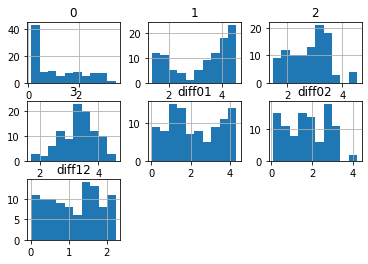

In [0]:
cc.hist()

In [0]:
cc

,0,1,2,3,question,diff01,diff02,diff12
0,2.414784,1.797109,3.428182,3.216188,I feel anxious when I think about the sexual aspects of my life.\t\t\t\t\t,0.617676,1.013397,1.631073
1,3.059548,4.148334,2.731591,2.997522,I have the ability to take care of any sexual needs and desires that I may have.\t\t\t\t\t,1.088786,0.327957,1.416743
2,3.468172,4.536141,3.042727,4.159612,I am very aware of my sexual feelings and needs.\t\t\t\t\t,1.067968,0.425445,1.493414
3,2.940452,3.395977,3.598409,3.325831,"I am motivated to avoid engaging in ""risky"" (i.e., unprotected) sexual behavior.\t\t\t\t\t",0.455526,0.657957,0.202432
4,2.334702,2.230547,2.422955,3.127607,The sexual aspects of my life are determined mostly by chance happenings.\t\t\t\t\t,0.104155,0.088252,0.192408
...,...,...,...,...,...,...,...,...
95,0.390144,4.431552,3.041591,4.058022,"Not only am I be capable of relating to a sexual partner, but it’s important to me that I relate...",4.041409,2.651447,1.389962
96,0.484600,4.381144,2.234773,3.710097,I’m not afraid of becoming sexually active.\t\t\t\t\t,3.896544,1.750173,2.146371
97,0.429158,3.797109,3.152045,3.493909,"If I just pay careful attention, I’ll be able to prevent myself from having any sexual problems....",3.367951,2.722887,0.645063
98,0.381930,1.469139,3.094773,3.253562,I feel sad when I think about my sexual experiences.\t\t\t\t\t,1.087209,2.712843,1.625634
